In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

In [21]:
# Step 1: Load the dataset
df = pd.read_csv('dataset.csv')

In [22]:
df.head(10)

,Vg,gate_length,tox,sides,trap,work_function,Id
0,0.000000,9,4,3,0.0,4.3,1.520000e-09
1,0.010000,9,4,3,0.0,4.3,2.140000e-09
2,0.023667,9,4,3,0.0,4.3,3.400000e-09
3,0.043256,9,4,3,0.0,4.3,6.590000e-09
4,0.071333,9,4,3,0.0,4.3,1.670000e-08
5,0.111577,9,4,3,0.0,4.3,5.900000e-08
6,0.169261,9,4,3,0.0,4.3,2.790000e-07
7,0.250018,9,4,3,0.0,4.3,9.870000e-07
8,0.350018,9,4,3,0.0,4.3,2.070000e-06
9,0.450018,9,4,3,0.0,4.3,3.480000e-06


In [23]:
df.tail()

,Vg,gate_length,tox,sides,trap,work_function,Id
4559,1.610889,7,6,8,1.0,4.7,0.000010
4560,1.710889,7,6,8,1.0,4.7,0.000011
4561,1.810889,7,6,8,1.0,4.7,0.000012
4562,1.910889,7,6,8,1.0,4.7,0.000013
4563,2.000000,7,6,8,1.0,4.7,0.000013


In [24]:
df.shape

(4564, 7)

In [25]:
# Split features and target
X = df[['Vg', 'gate_length', 'sides', 'trap' ,'work_function']].values
y = df['Id'].values.reshape(-1, 1)

In [26]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

In [27]:
# No scaling, use raw data
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

In [28]:
# Build CNN model
cnn_model = Sequential([
    InputLayer(input_shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [29]:
# Compile model
cnn_model.compile(
    optimizer='adam',
    loss=MeanSquaredError(),
    metrics=[MeanAbsoluteError()]
)


In [30]:
# Train model
cnn_history = cnn_model.fit(
    X_train_cnn,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0545 - mean_absolute_error: 0.1394 - val_loss: 0.0311 - val_mean_absolute_error: 0.0607
Epoch 2/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0319 - mean_absolute_error: 0.0579 - val_loss: 0.0331 - val_mean_absolute_error: 0.0694
Epoch 3/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0342 - mean_absolute_error: 0.0660 - val_loss: 0.0292 - val_mean_absolute_error: 0.0642
Epoch 4/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286 - mean_absolute_error: 0.0622 - val_loss: 0.0284 - val_mean_absolute_error: 0.0606
Epoch 5/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0270 - mean_absolute_error: 0.0567 - val_loss: 0.0270 - val_mean_absolute_error: 0.0429
Epoch 6/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261 - mean_absolute_error: 0.0534 - val_loss: 0.0264 - val_mean_absolute_error: 0.0447
Epoch 7/200
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0276 - mean_absolute_error: 0.0568 - val_loss

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


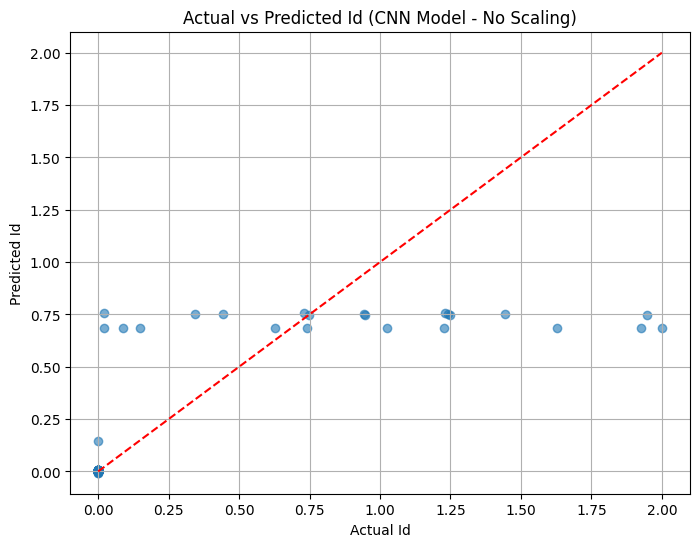

In [31]:
# Predict and plot
y_pred = cnn_model.predict(X_test_cnn)
y_actual = y_test

# %%
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')
plt.xlabel("Actual Id")
plt.ylabel("Predicted Id")
plt.title("Actual vs Predicted Id (CNN Model - No Scaling)")
plt.grid(True)
plt.show()

In [32]:
# %%
# Evaluate the model on the test set
test_loss, test_mae = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Test Loss: 0.0101, Test MAE: 0.0160


In [33]:
# Save model and scalers
cnn_model.save("cnn_model_no_scaling.keras")

In [34]:
# Prediction function (no scaling)
def predict_custom_data(custom_data):
    custom_data = np.array(custom_data).reshape(1, 6, 1)
    predicted_id = cnn_model.predict(custom_data, verbose=0)
    return predicted_id[0][0]

In [17]:
# Custom input
vg_input = float(input("Enter Vg value (in V): "))
gate_input = float(input("Enter gate length (in nm): "))
tox_input = float(input("Enter tox: "))
side_input = float(input("Enter number of sides: "))
trap_input = float(input("Is trap charge present? (1 = yes, 0 = no): "))
work_function_input = float(input("Enter work function (in eV): "))

custom_input = [vg_input, gate_input, tox_input, side_input, trap_input, work_function_input]
predicted_id = predict_custom_data(custom_input)

print(f"\n--- Input Summary ---")
print(f"Vg: {vg_input} V")
print(f"Gate Length: {gate_input} nm")
print(f"Tox: {tox_input} nm")
print(f"Sides: {side_input}")
print("Trap Charge:", "Present" if trap_input == 1 else "Not Present")
print(f"Work Function: {work_function_input} eV")
print(f"\n--- Output Summary ---")
print(f"Predicted Id: {predicted_id:.4e} A")


--- Input Summary ---
Vg: 0.55 V
Gate Length: 7.0 nm
Tox: 4.0 nm
Sides: 3.0
Trap Charge: Not Present
Work Function: 4.3 eV

--- Output Summary ---
Predicted Id: 1.4276e-02 A


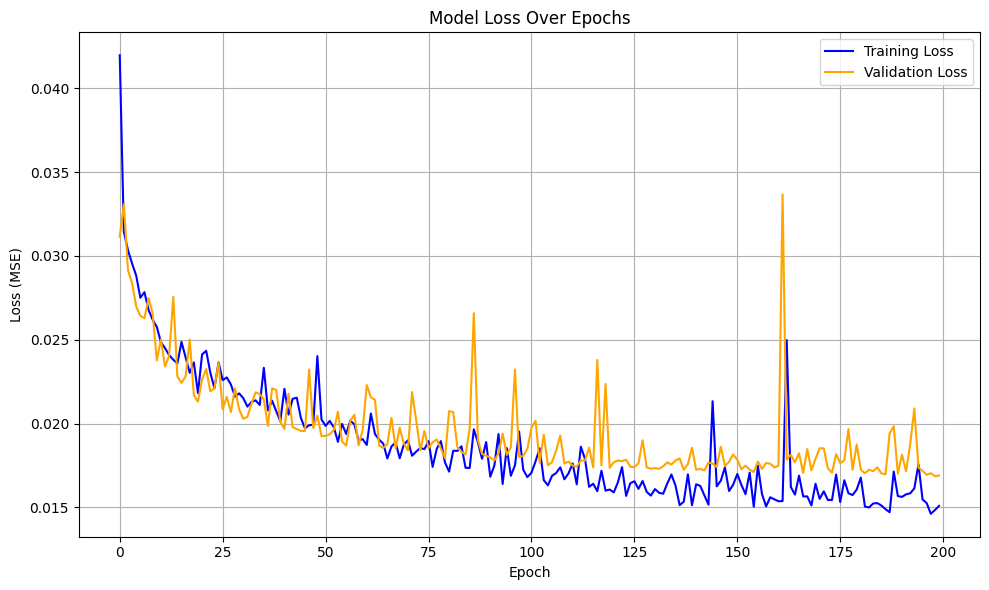

In [35]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss', color='blue')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()